In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import tilemapbase
tilemapbase.start_logging()
tilemapbase.init(create=True)

# What to do about a "busy" background

The following example is motivated by [Issue 14](https://github.com/MatthewDaws/TileMapBase/issues/14).  It uses the location of my current office in Preston, UK.

The original problem, asked in the issue, is what to do about a very detailed background, which is obscuring the information being overlayed.  I offer here two possible solutions:

  1. Firstly, we change the "width" parameter.  This has the effect of changing the "zoom" (which could also be set manually) and forces the use of the different sized tiles.
  
  2. Another option is to use the ability to pass keyword arguments to the `plot` method.  Using this, we see the alpha to `0.5` which has the effect of making the background less visible.
  
  3. A final option is to experiment with using a different tile set.

In [3]:
my_office = ( -2.709622, 53.761523)

degree_range = 0.003
extent = tilemapbase.Extent.from_lonlat(my_office[0] - degree_range, my_office[0] + degree_range,
                  my_office[1] - degree_range, my_office[1] + degree_range)
extent = extent.to_aspect(1.0)
extent

Extent((0.49246493888888887,0.3221970963245388)->(0.49248160555555553,0.32221376299120547) projected as normal)

In [5]:
t = tilemapbase.tiles.build_OSM()

The original version with a "width" roughly corresponding to pixel size.

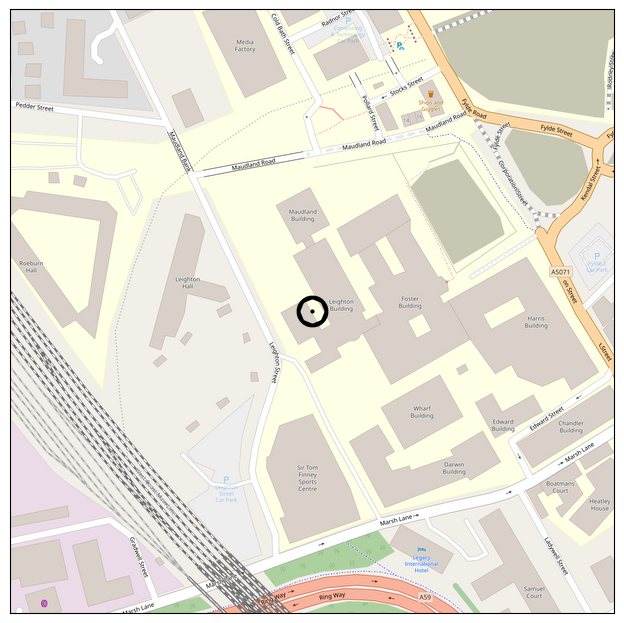

In [6]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plotter = tilemapbase.Plotter(extent, t, width=600)
plotter.plot(ax, t)

x, y = tilemapbase.project(*my_office)
ax.scatter(x,y, marker=".", color="black", linewidth=20)
None

We use a larger `width` which has the effect of using more "zoomed in" tiles.  There is less "detail", but also of course the text size etc. becomes much smaller.

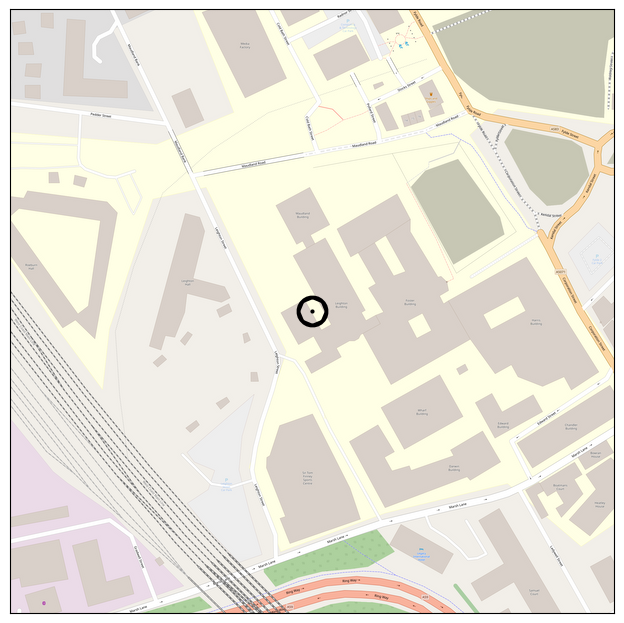

In [7]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plotter = tilemapbase.Plotter(extent, t, width=1200)
plotter.plot(ax, t)

x, y = tilemapbase.project(*my_office)
ax.scatter(x,y, marker=".", color="black", linewidth=20)
None

Now we use a smaller `width`.  This probably introduces more detail.

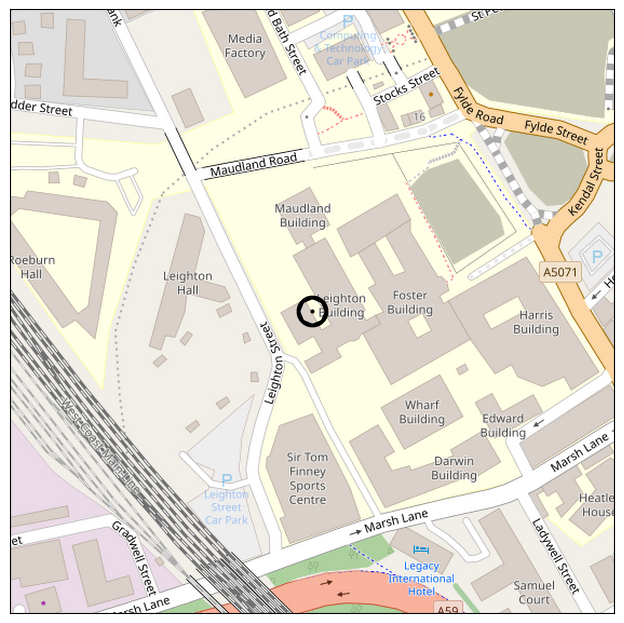

In [8]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plotter = tilemapbase.Plotter(extent, t, width=300)
plotter.plot(ax, t)

x, y = tilemapbase.project(*my_office)
ax.scatter(x,y, marker=".", color="black", linewidth=20)
None

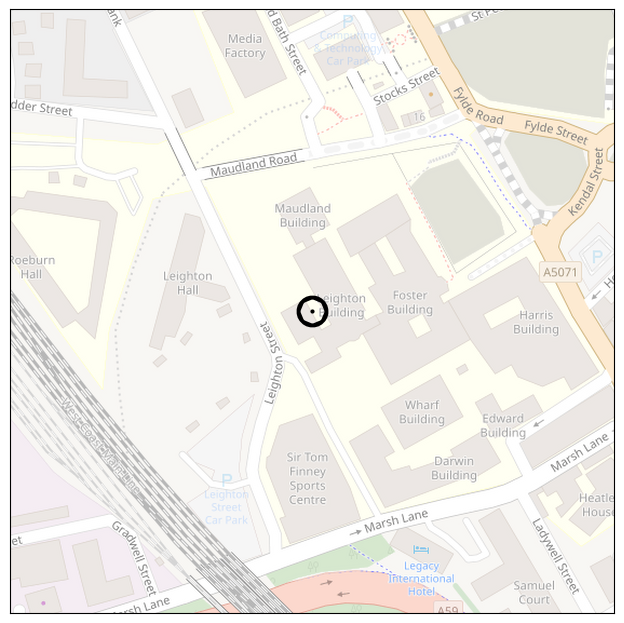

In [9]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plotter = tilemapbase.Plotter(extent, t, width=300)
plotter.plot(ax, t, alpha=0.5)

x, y = tilemapbase.project(*my_office)
ax.scatter(x,y, marker=".", color="black", linewidth=20)
None

Finally, we experiment with changing tile set used.  For some reason, I cannot get tab complete to work from the base `tilemapbase.tiles` but support is only current for either `Carto` or `Stamen` variants, so just type `tilemapbase.tiles.C` or `.S` and then tab complete to see the options.

`Stamen_Watercolour` is very stylised, but might be useful for a background??

`Carto_Light` gives a similar effect to using OpenStreetMap tiles with `alpha=0.5`

In [23]:
t = tilemapbase.tiles.Stamen_Watercolour

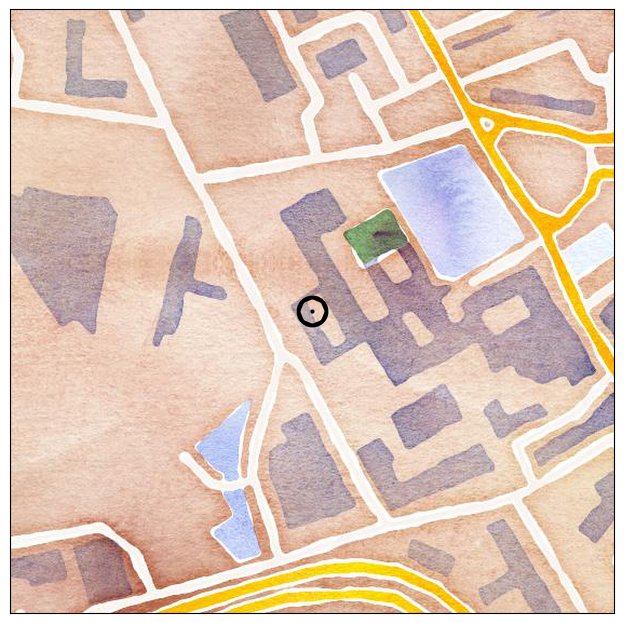

In [24]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plotter = tilemapbase.Plotter(extent, t, width=300)
plotter.plot(ax, t)

x, y = tilemapbase.project(*my_office)
ax.scatter(x,y, marker=".", color="black", linewidth=20)
None

In [31]:
t = tilemapbase.tiles.Carto_Light

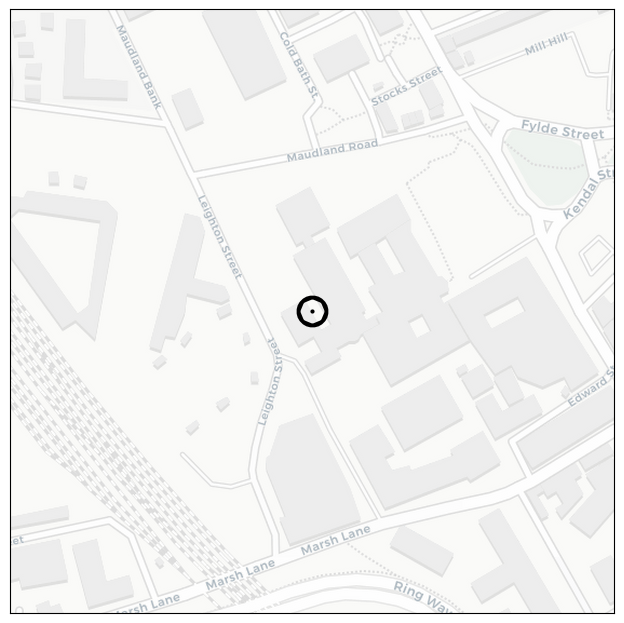

In [32]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plotter = tilemapbase.Plotter(extent, t, width=300)
plotter.plot(ax, t)

x, y = tilemapbase.project(*my_office)
ax.scatter(x,y, marker=".", color="black", linewidth=20)
None